# Exploratory Data Analysis and Data Cleaning

The data will be cleaned and descriptive analysis will be conducted to extract interesting insights from the data provided before diving into model building. 


Sub-Tasks 
1. Clean the data
2. Perform exploratory data analysis

## Contents
1. Import libraries 
2. Load the data
    * Overview of datasets
    * Combining two dataframes
3. General statistics
    * Data types
    * Data statistics
    * Missing data
4. Data visualisation
    * Parameters
    * Variables distribution
5. Data cleaning
    * Duplicates
    * Missing values
6. Data transformation
    * Missing data
    * Dates
    * Negative data
7. Pickling





## 1. Import libraries for analysis 

In [1]:
#library for data manipulation and preprocessing
import pandas as pd

#library for number crunching
import numpy as np

#library for visualisation
import matplotlib.pyplot as plt
#show plots in jupyter notebook
%matplotlib inline

import scipy.stats

import seaborn as sns
#set plot style
sns.set(color_codes=True)

import matplotlib.dates as mdates
plt.style.use('bmh')

#to convert an object in memory to a byte stream that can be stored on disk or sent over a network
import pickle

## 2. Load the data

#### Load the data into a dataframe

In [2]:
train_data = pd.read_csv("ml_case_training_data.csv")
churn_data = pd.read_csv("ml_case_training_output.csv")
history_data = pd.read_csv("ml_case_training_hist_data.csv")

Print the first 3 rows of each dataset

In [3]:
train_data.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800


In [4]:
churn_data.head(3)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0


In [5]:
history_data.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [6]:
train_data.shape

(16096, 32)

In [7]:
churn_data.shape

(16096, 2)

In [8]:
history_data.shape

(193002, 8)

Merge the history customer data and churn data datasets per id

In [9]:
train = pd.merge(train_data, churn_data, how="right", on=["id"])
train.tail(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,...,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


## 3. General Statistics

#### Descriptive Statistics

Conduct basic statistics of the data

In [10]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


* The minimum values for consumption, forecasts and margins are negative. For this to be the case, it will mean that the client SME companies are producing their own energy and providing energy to PowerCO the supplier. As this is unlikely, the negative values will be seen as corrupted data and will be dealt with in the next steps.
* The `campaign_disc_ele` is an empty column

In [11]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


For the historic price data, all looks good overall.
The negative values in the price of power would alos be considered as corrupted data and would be chnaged to positve when cleaning the data.

#### Data types

Note that the output has been transformed into a dataframe to facilitate visualisation

In [12]:
pd.DataFrame({"Data type":train.dtypes})

,Data type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [13]:
pd.DataFrame({"Data type":history_data.dtypes})

,Data type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


#### Missing data

This step identifies how many missung values there are in our data as initially highlighted when the data was read into the dataframe.

This output has also be transfomed in order to be used to facilitate visualisation.

In [14]:
pd.DataFrame({"Missing values (%)" : train.isnull().sum()/len(train.index)*100})

,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


From the above output we can see that there are a number of columns that have over 75% of the data missing. We can also see here that the column `campaign_disc_ele` has 100% of the data missing; this confirms the empty column discovery in the descriptive statistics step.

In this case these columns may be removed.

In [15]:
pd.DataFrame({"Missing values (%)" : history_data.isnull().sum()/len(history_data.index)*100})

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


The above output shows that there is a low % of missing values in the data. In this case, we will replace these missing values with approxomates in the data transformation stage.

## 4. Data Visualisations

Producing visualisations to give an over on main parameters/variables

#### Churn

The churning rate

In [16]:
churn = train[["id","churn"]]

In [17]:
#Rename columns for visualisation purposes
churn.columns = ["Companies", "churn"]

In [18]:
def plot_stacked_bars (dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot staked bars with annotations
    """
    ax = dataframe.plot(kind="bar",
                       stacked=True,
                       figsize=size_,
                       rot=rot_,
                       title=title_)
    #Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    #Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    #Labels
    plt.ylabel("Company base (%)")
    plt.show

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    #Iterate over the plotted rectangles/bars
    for p in ax.patches:
        #Calculate annotation
        value = str(round(p.get_height(),1))
        #If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
                    ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                    color=colour,
                    size=textsize,
                   )

In [19]:
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100

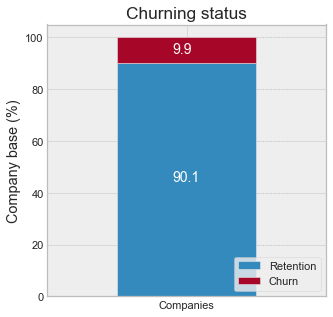

In [20]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5,5), legend_="lower right")

10% of the total customer have churned.

#### SME activity

Largest churn problwm found in SME segement as identified by PowerCo.
Let's show the activity distribution of the companies and the sales channel.

In [21]:
#define activity
activity = train[["id", "activity_new", "churn"]]

In [22]:
activity = activity.groupby([activity["activity_new"],
                            activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0],ascending=False)

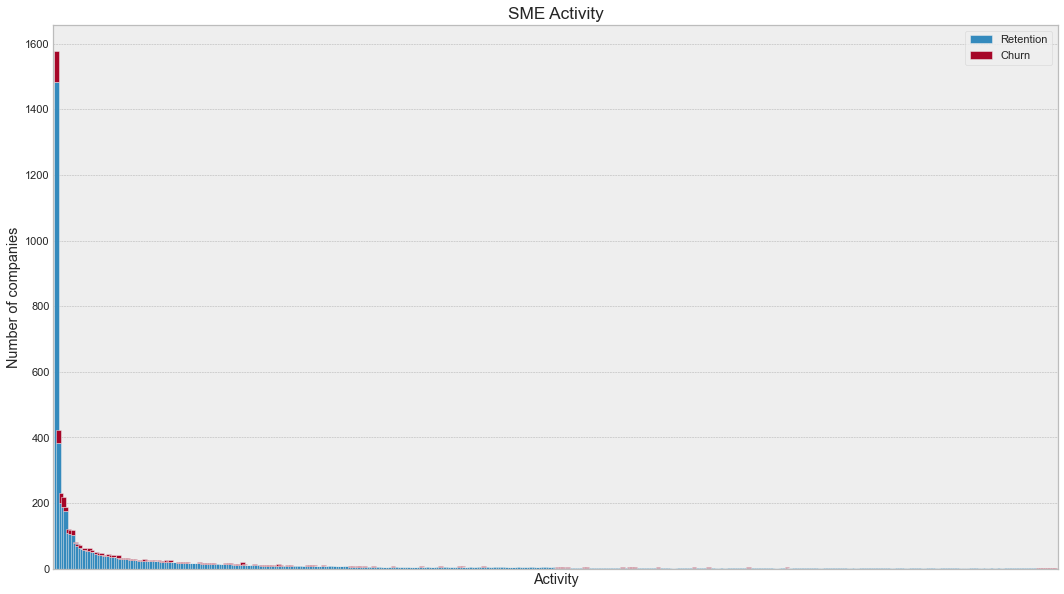

In [23]:
activity.plot(kind="bar",
             figsize=(18, 10),
             width=2,
             stacked=True,
             title="SME Activity")
#Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
#Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
#Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()

The distribution of the classes over the labeled data despite having 60% of the entries missing.

Here we can see the churn is not specifically related to any SME category in particular as graph shows it varies over each specified activity

#### How will the SME activity influence our predictive model?

The predictive model is likely to struggle accurately predicting the SME activity due to the large number of categories and low number of companies belonging to each category.

#### Sales channel

The sales channel seems to be important when predicting the churn of a user. How is the user contacted for sales?

In [24]:
#define channel
channel = train[["id", "channel_sales", "churn"]]

In [25]:
channel = channel.groupby([channel["channel_sales"],
                          channel["churn"]])["id"].count().unstack(level=1).fillna(0)

In [26]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

We will plot the categories though the missing values

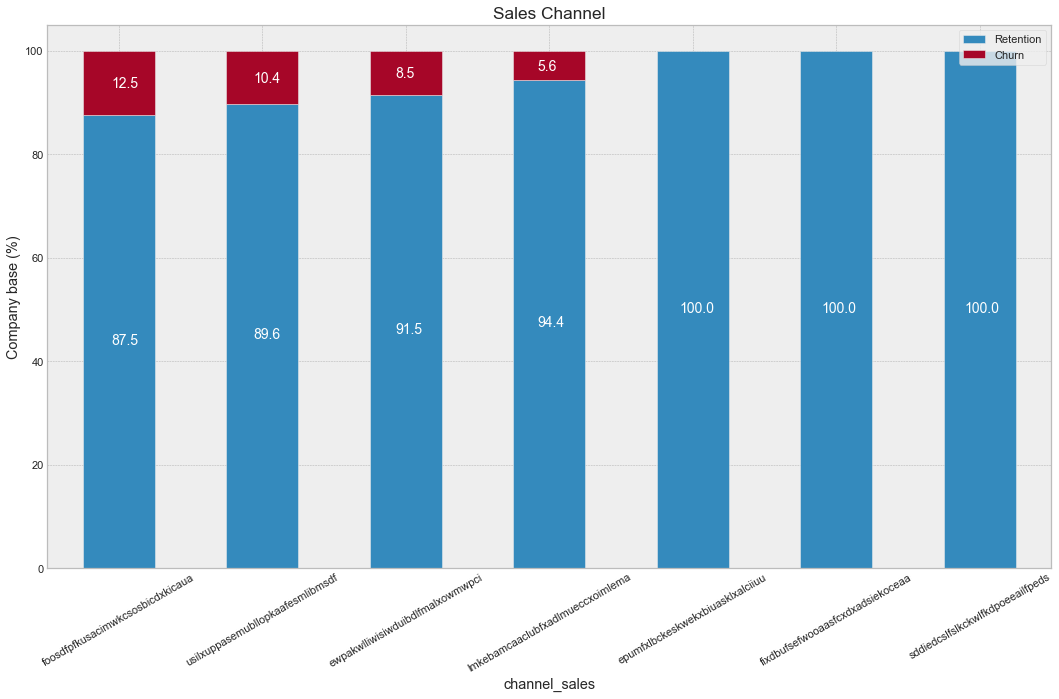

In [27]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

The above graph depicts nothing unusual

#### Consumption

Look at consumption over the last month and year and the distribution through histograms

In [28]:
#define consumption
consumption = train[["id", "cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

In [29]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    #Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                        "Churn": dataframe[dataframe["churn"]==1][column]})
    #plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    #X-axis label
    ax.set_xlabel(column)
    #change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Plot the histogram

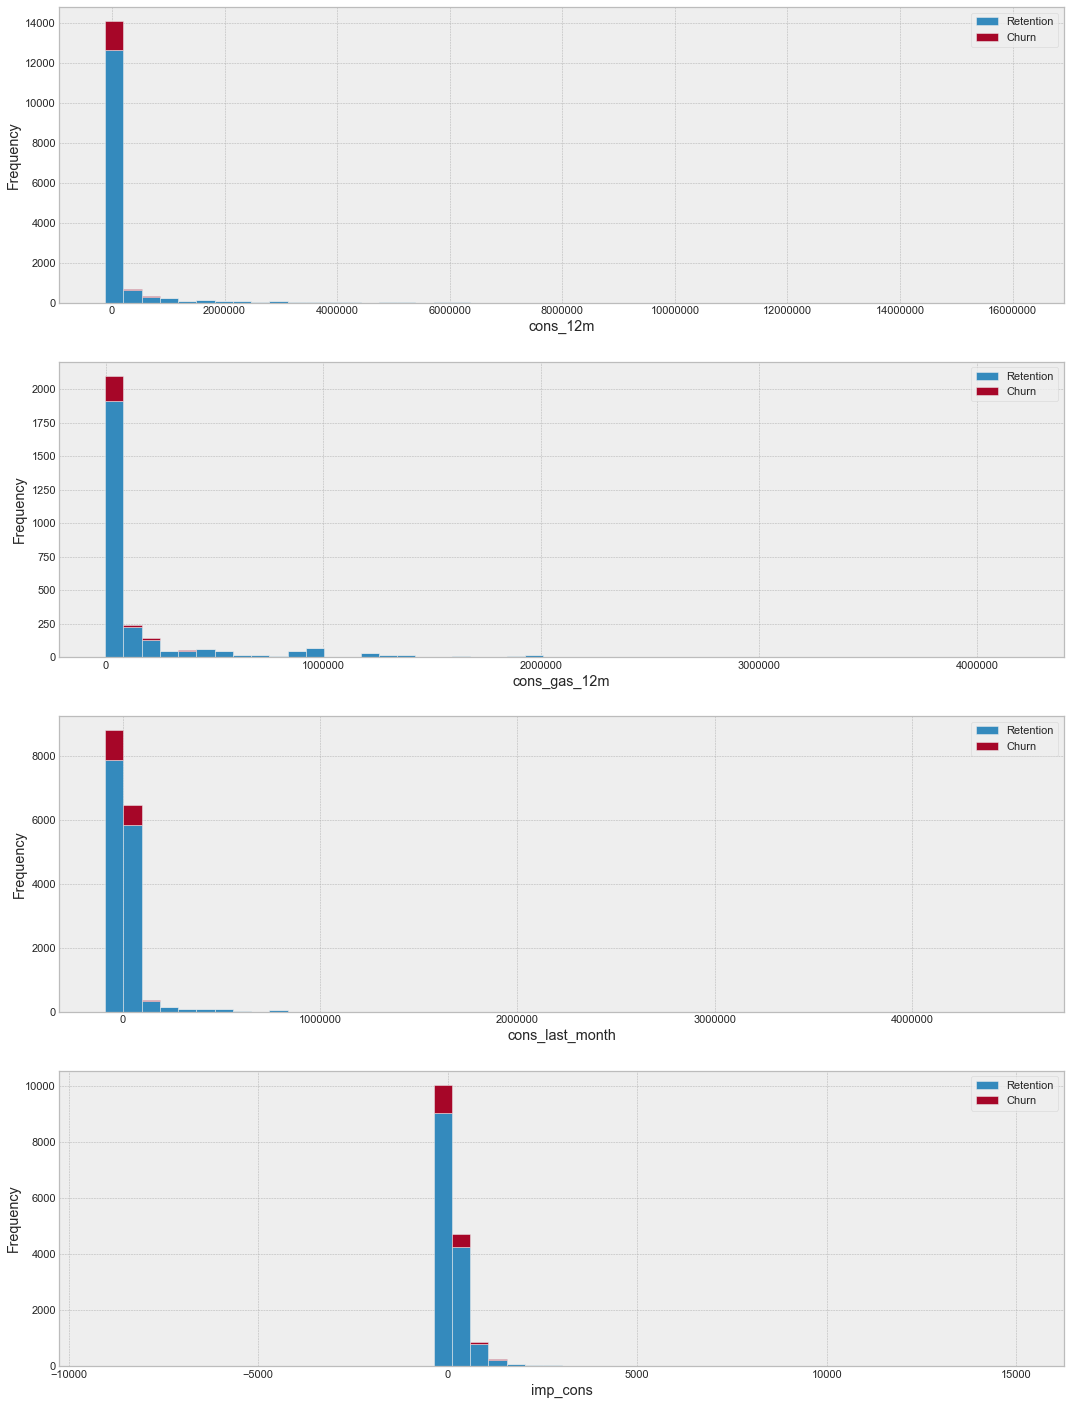

In [30]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
#plot the histogram
plot_distribution(consumption, "cons_12m", axs[0])
#note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"]=="t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

We can clearly see that the consumption data is highly skewed to the right, showing a very long right-tail towards the higher values of the distribution.
The values on the higher end and lower ends of the distribution are likely to be outliers. These outliers will be visualised in more detail using boxplots


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

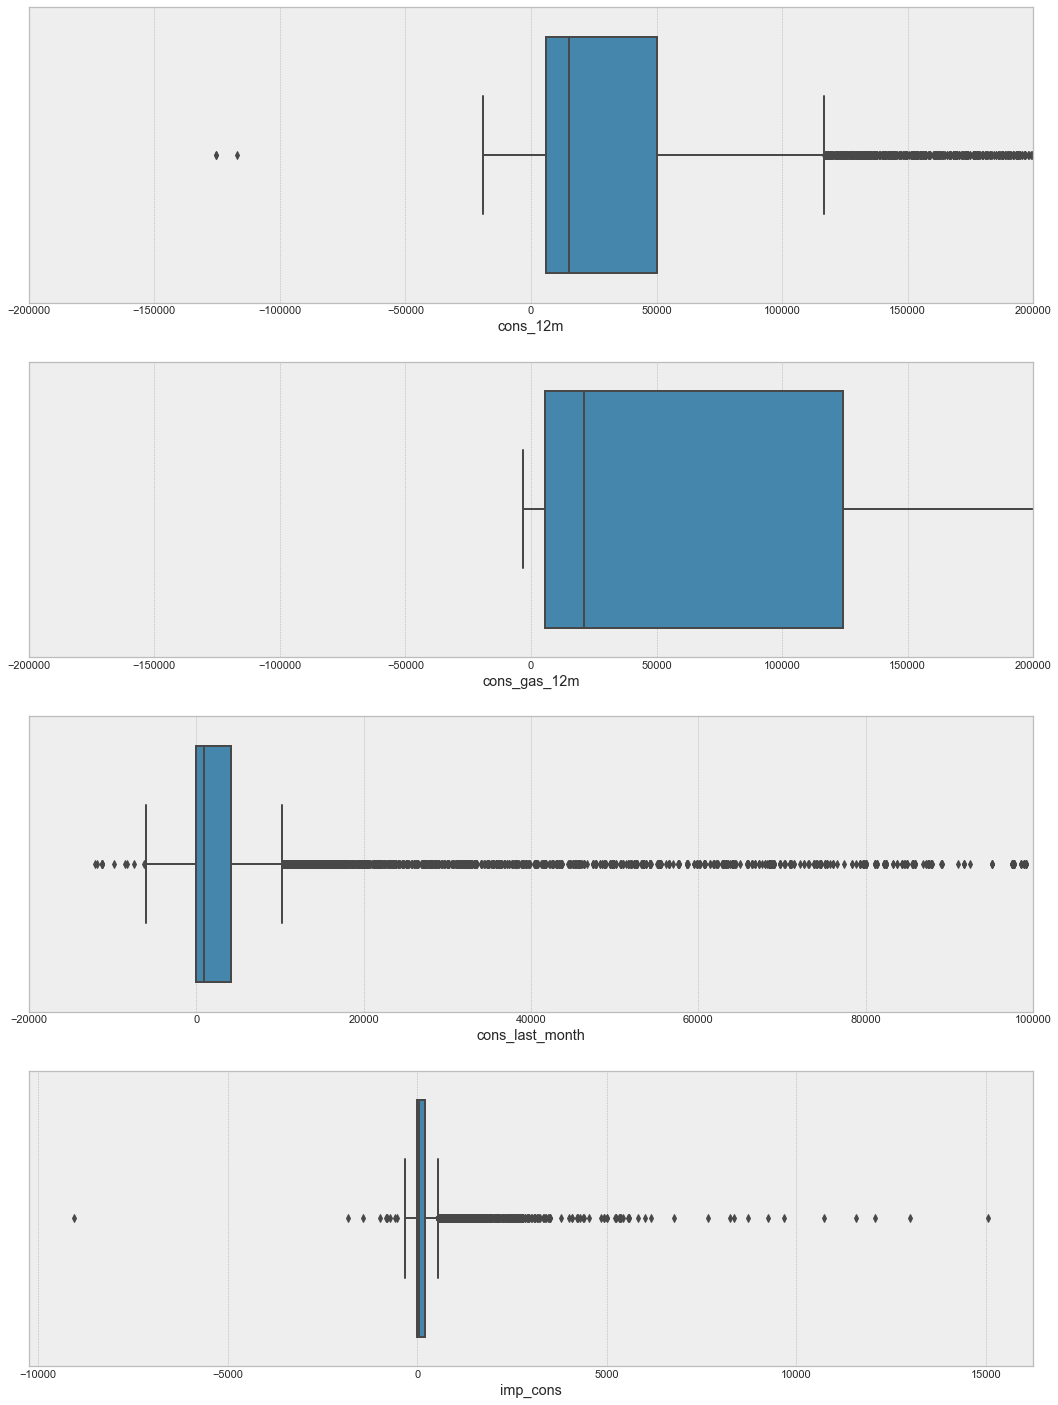

In [31]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
#Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"]== "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

#remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    
#set x-axis limit
axs[0].set_xlim(-200000, 200000)
axs[1].set_xlim(-200000, 200000)
axs[2].set_xlim(-20000, 100000)
plt.show()

As the box plots show, we have highly skewed data and a number of outliers. This will be dealt within in the data cleaning stage.

#### Dates

In [32]:
dates = train[["id", "date_activ", "date_end", "date_modif_prod", "date_renewal", "churn"]].copy()

In [33]:
#Transform date columns to datetime type

dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')

In [34]:
def plot_dates(dataframe, column, fontsize_=12):
    """
    Plot monthly churn and retention distributions
    """
    #Group by month
    temp = dataframe[[column,
                      "churn",
                      "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    #plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    #change x=axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    #change xlabel size
    plt.ylabel("Number of companies")
    #Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()

def line_format(label):
    """
    Convert time label to format of pandas line plot
    """
    month = label.month_name()[:1]
    if label.month_name()=="January":
        month += f'\n{label.year}'
    return month

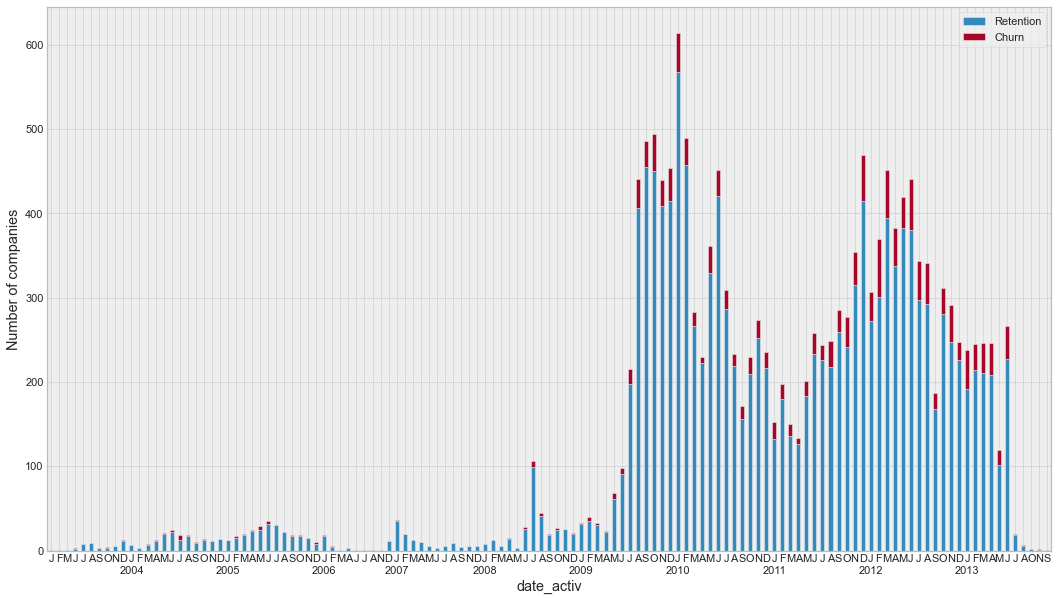

In [35]:
plot_dates(dates, "date_activ", fontsize_=8)

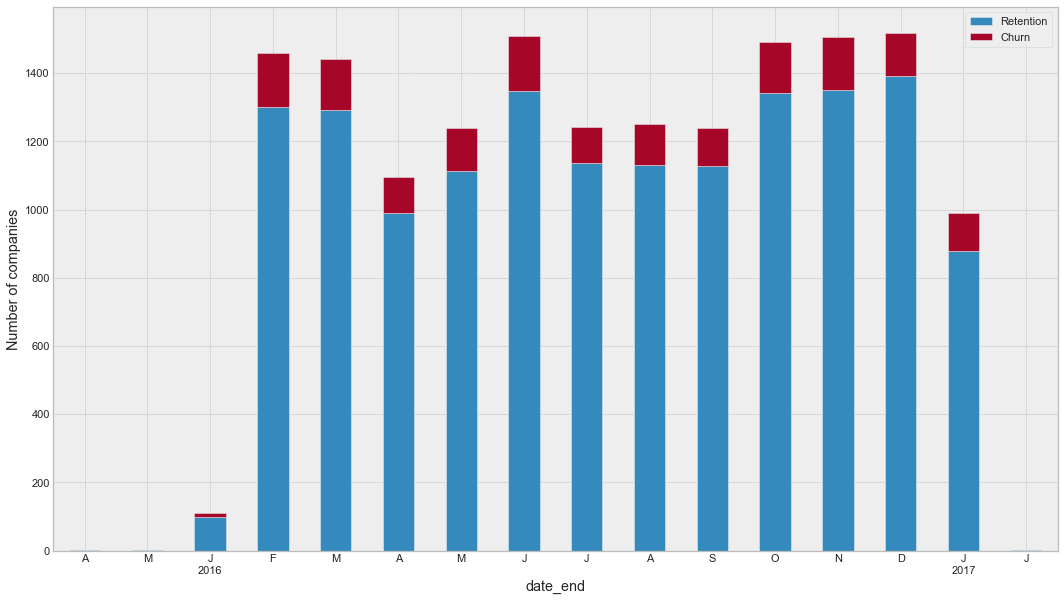

In [36]:
plot_dates(dates, "date_end")

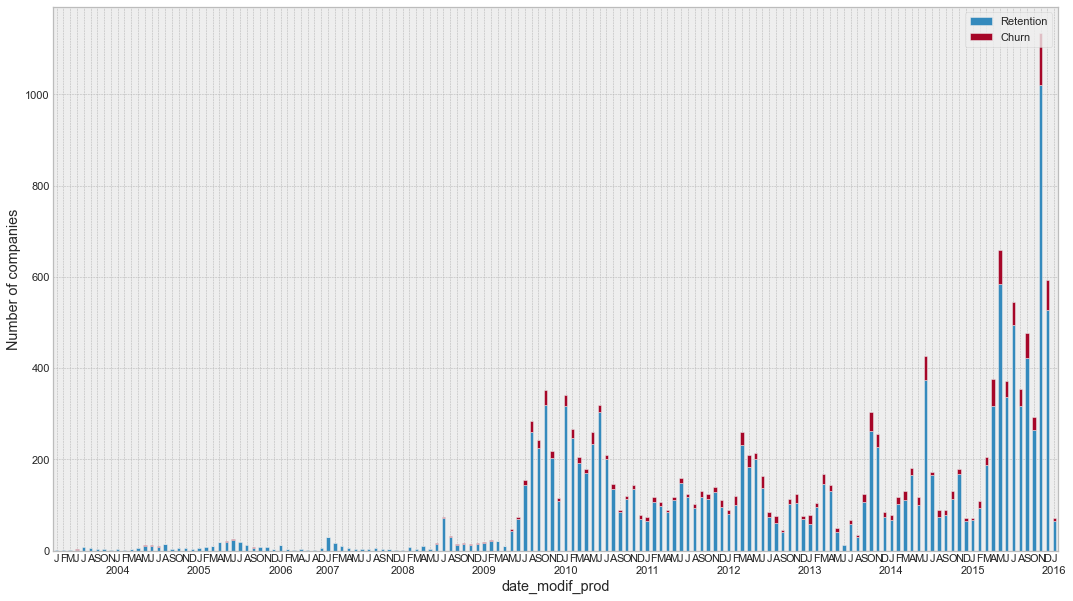

In [37]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

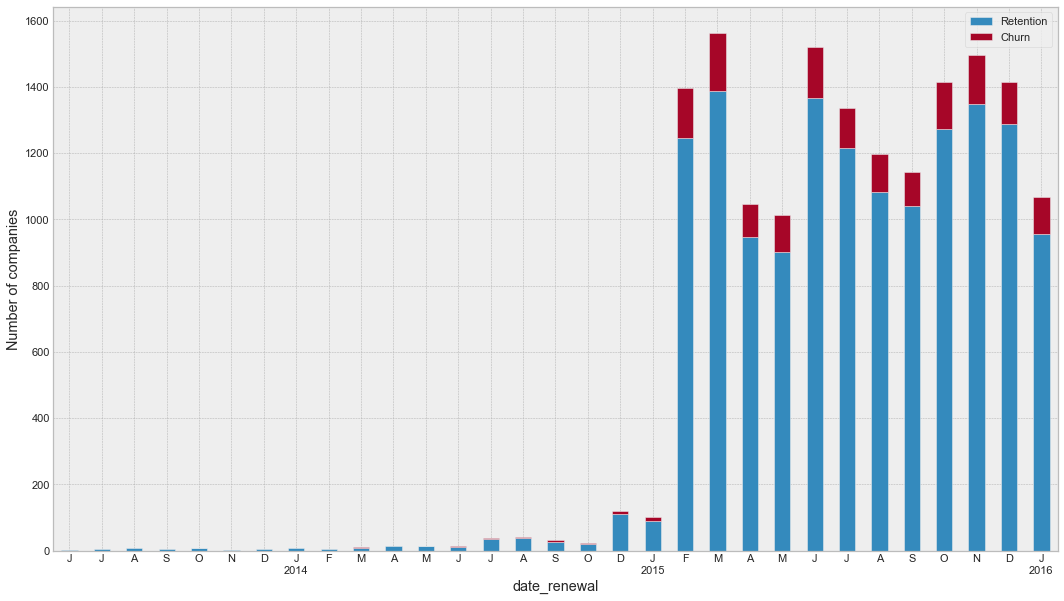

In [38]:
plot_dates(dates, "date_renewal")

#### Forecsat

In [39]:
forecast = train[["id","forecast_base_bill_ele","forecast_base_bill_year",
 "forecast_bill_12m","forecast_cons","forecast_cons_12m",
 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
 "forecast_price_energy_p1","forecast_price_energy_p2",
 "forecast_price_pow_p1","churn"]]

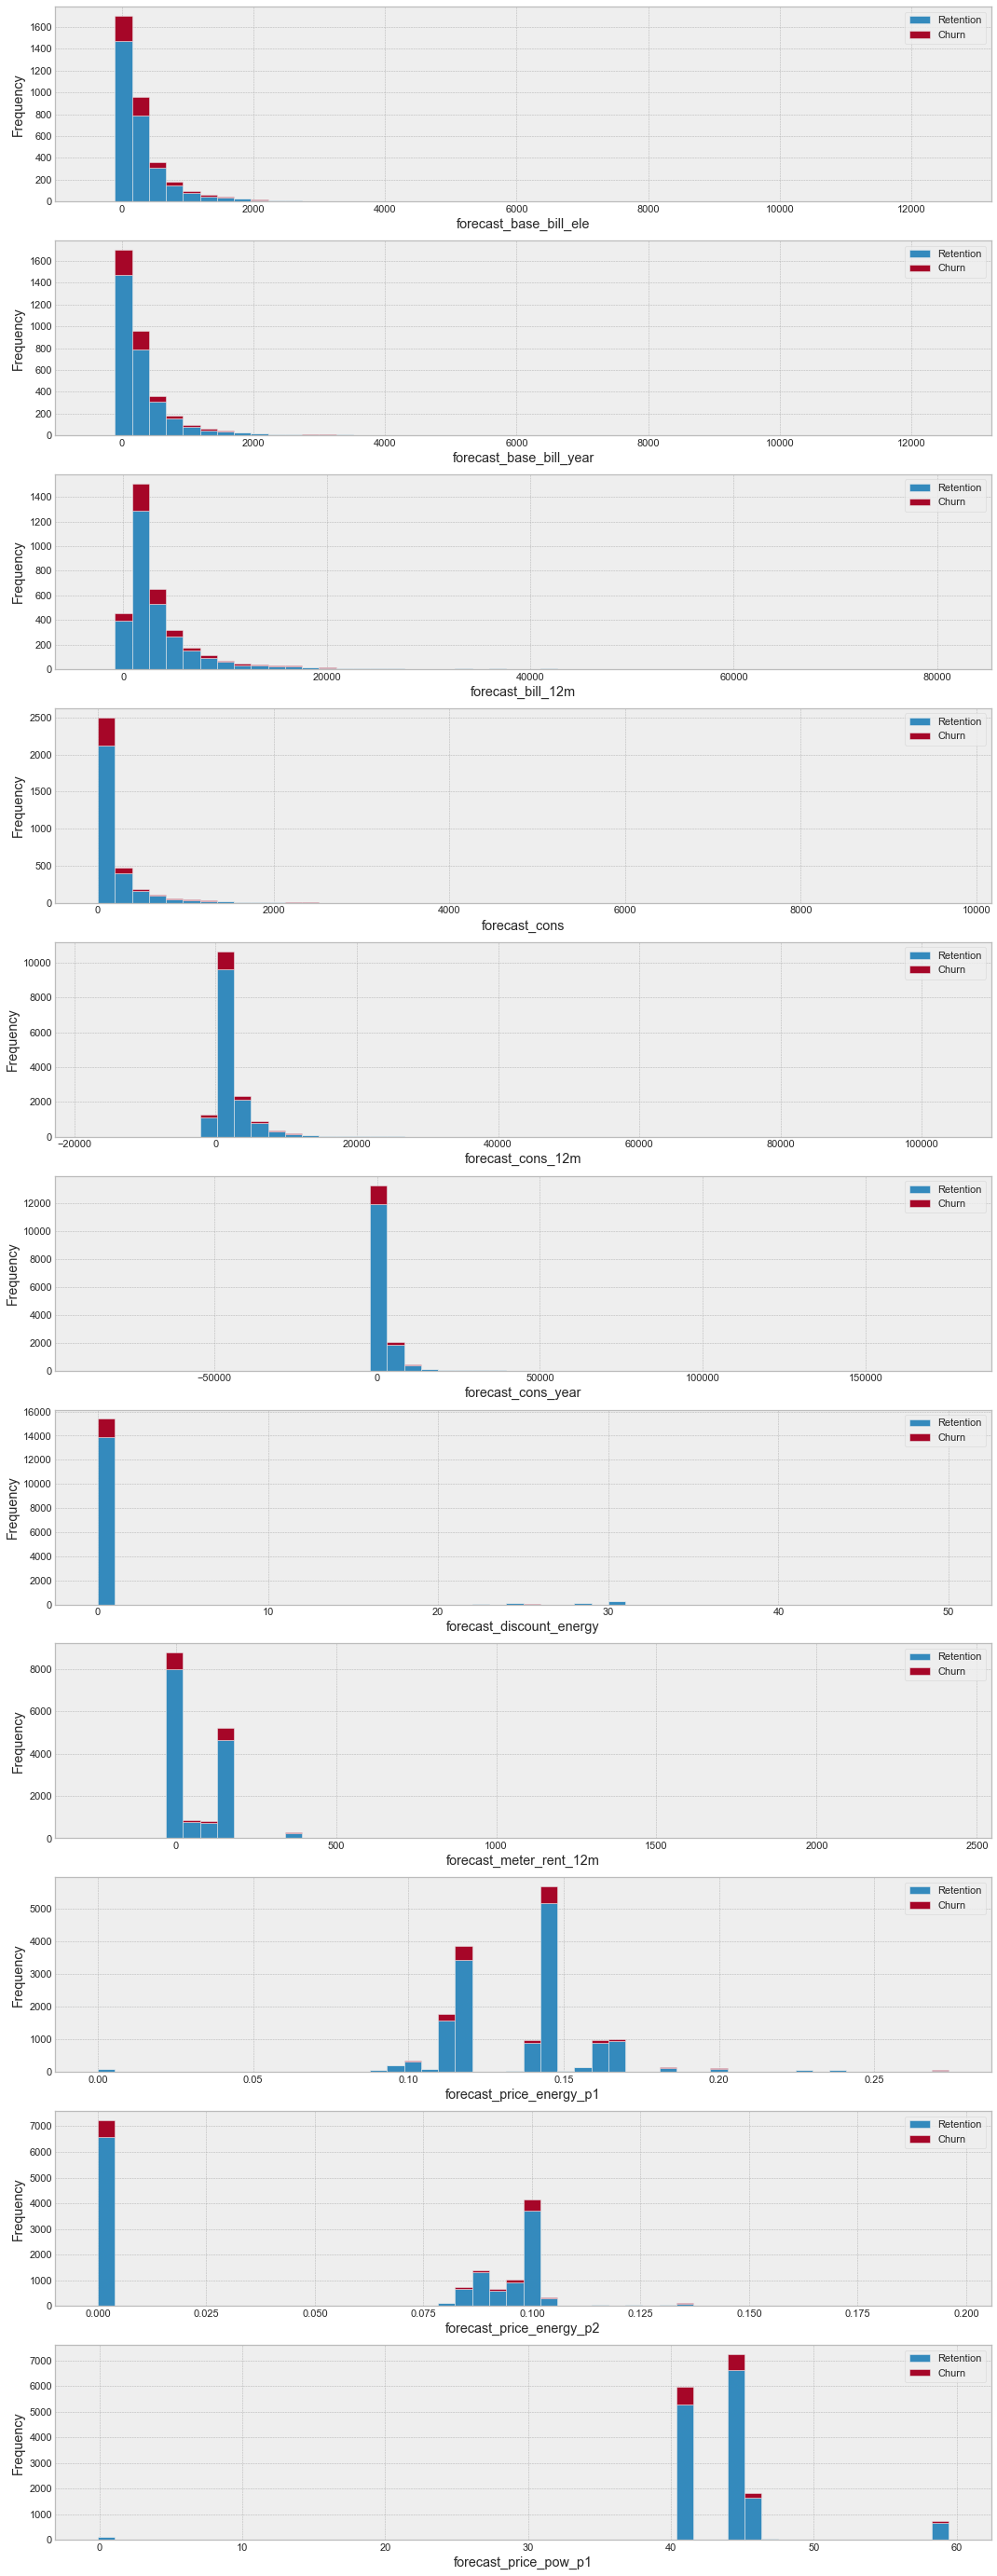

In [40]:
 fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution(train, "forecast_base_bill_ele", axs[0])
plot_distribution(train, "forecast_base_bill_year", axs[1])
plot_distribution(train, "forecast_bill_12m", axs[2])
plot_distribution(train, "forecast_cons", axs[3])
plot_distribution(train, "forecast_cons_12m", axs[4])
plot_distribution(train, "forecast_cons_year", axs[5])
plot_distribution(train, "forecast_discount_energy", axs[6])
plot_distribution(train, "forecast_meter_rent_12m", axs[7])
plot_distribution(train, "forecast_price_energy_p1", axs[8])
plot_distribution(train, "forecast_price_energy_p2", axs[9])
plot_distribution(train, "forecast_price_pow_p1", axs[10])

With the histograms above, we can see that a lot of the variables are highly skewed to the right, creating a very long tail on the higher values

#### Contract type (electricity, gas)

In [41]:
#define the contract types
contract_type = train[["id", "has_gas", "churn"]]

In [42]:
contract = contract_type.groupby([contract_type["churn"],
                                 contract_type["has_gas"]])["id"].count().unstack(level=0)

In [43]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

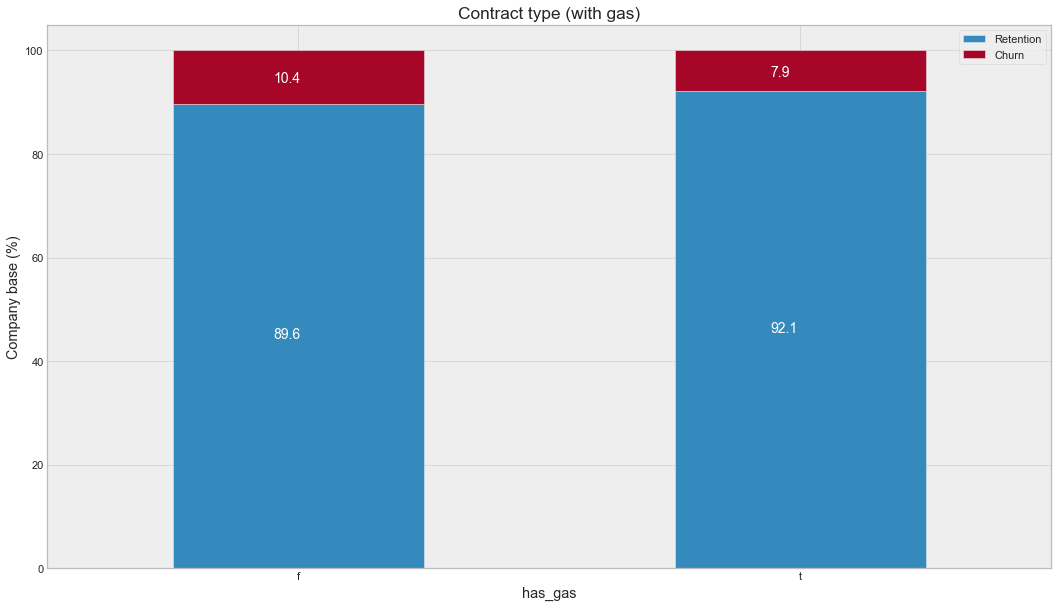

In [44]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

#### Margins

In [45]:
margin = train[["id", "margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


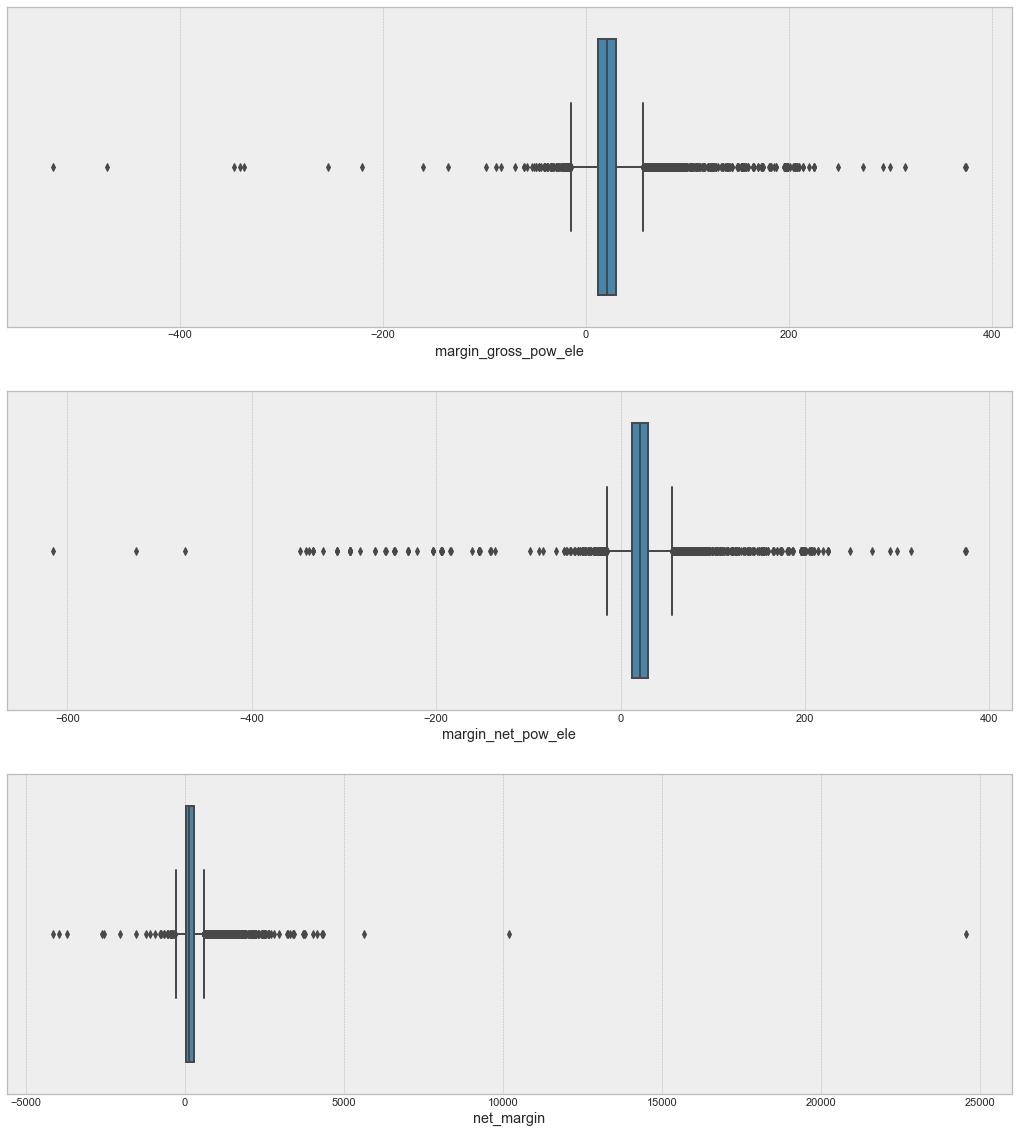

In [46]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
#plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"], ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])

#remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

As we can see in the above boxplots, there are a number of outliers in the records for margins

#### Subscribed power

In [47]:
#define power
power = train[["id", "pow_max", "churn"]].fillna(0)

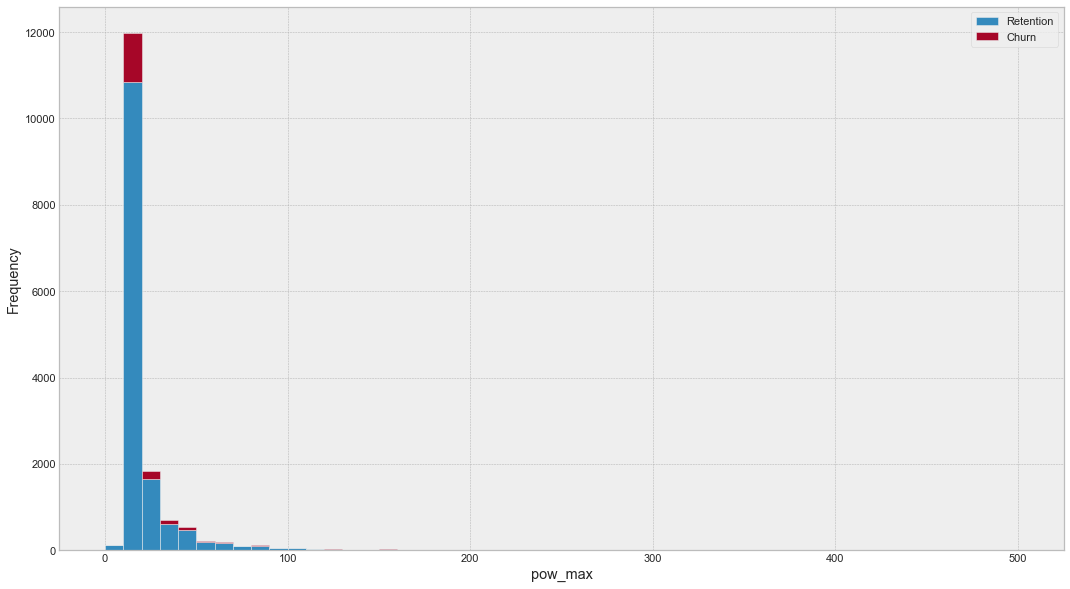

In [48]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

#### Others

In [49]:
others = train[["id", "nb_prod_act", "num_years_antig", "origin_up", "churn"]]

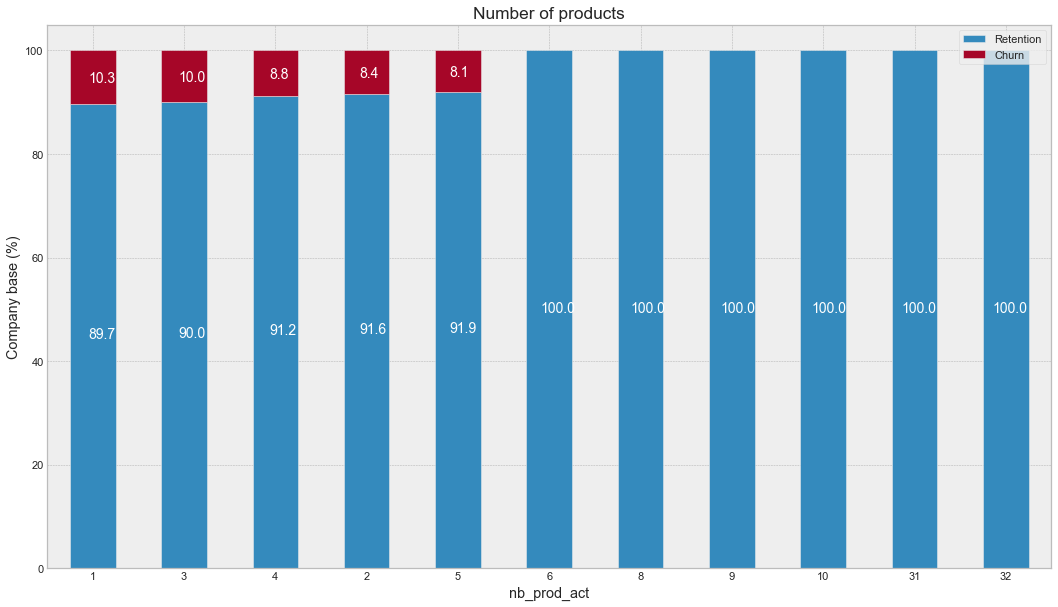

In [50]:
products = others.groupby([others["nb_prod_act"], others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

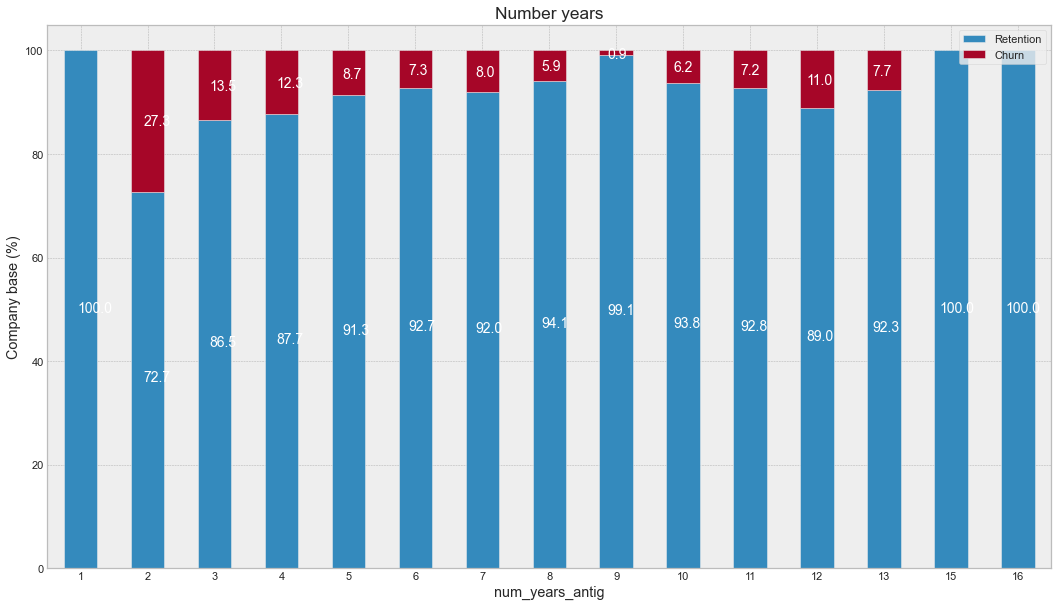

In [51]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

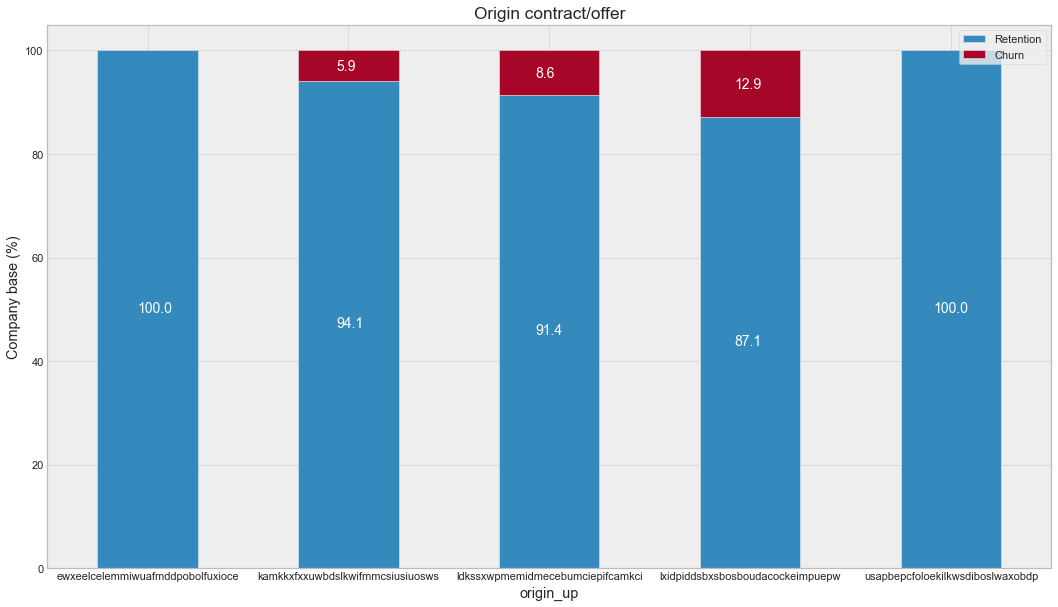

In [52]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

## 5. Data Cleaning

#### Duplicates

In [53]:
duplicate_rows_train = train[train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_train.shape)

number of duplicate rows:  (0, 33)


There are no duplicate records in our data which means all the data we have is unique

#### Missing values

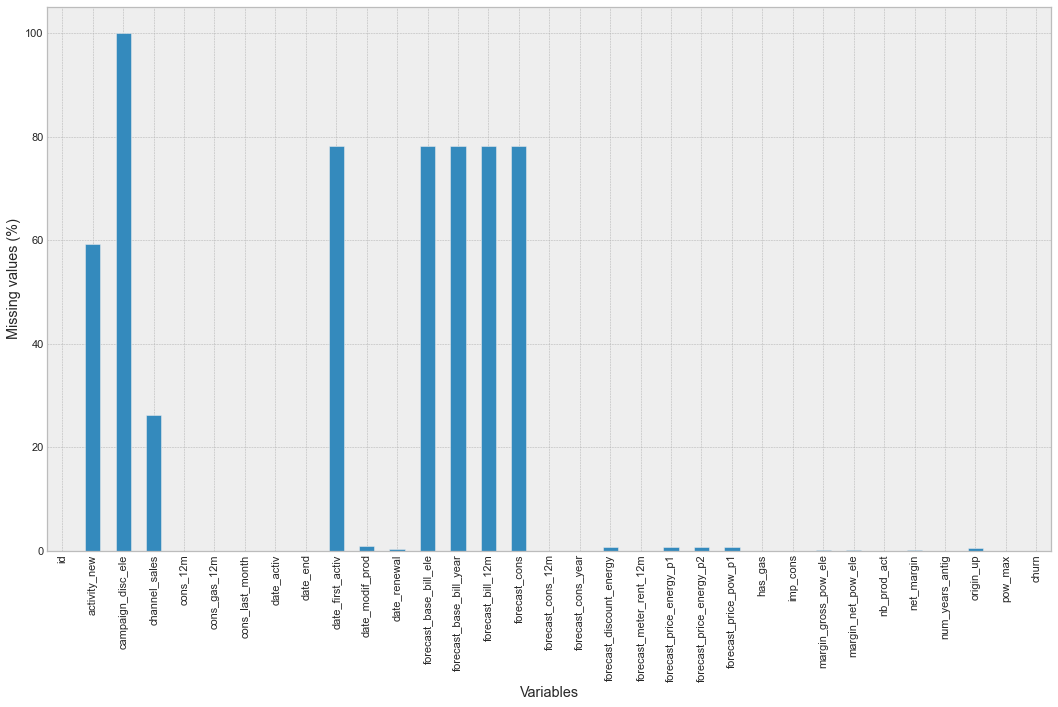

In [54]:
#plot the missing data
(train.isnull().sum()/len(train.index)*100).plot(kind="bar", figsize=(18,10))

#set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

The above plot shows that are a number of variables that have over 60% of its records missing. 

For these variables, these will be removed for simplicity

In [55]:
#remove the variables with over 60% of missing data
train.drop(columns=["campaign_disc_ele", "date_first_activ", 
                    "forecast_base_bill_ele", "forecast_base_bill_year",
                   "forecast_bill_12m", "forecast_cons"], inplace=True)

In [56]:
#review dataframe without dropped columms
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


## 6. Data transformation

#### Missing data

Dealing with missing data for pricing

In [57]:
missing_data_percentage = history_data.isnull().sum()/len(history_data.index)*100

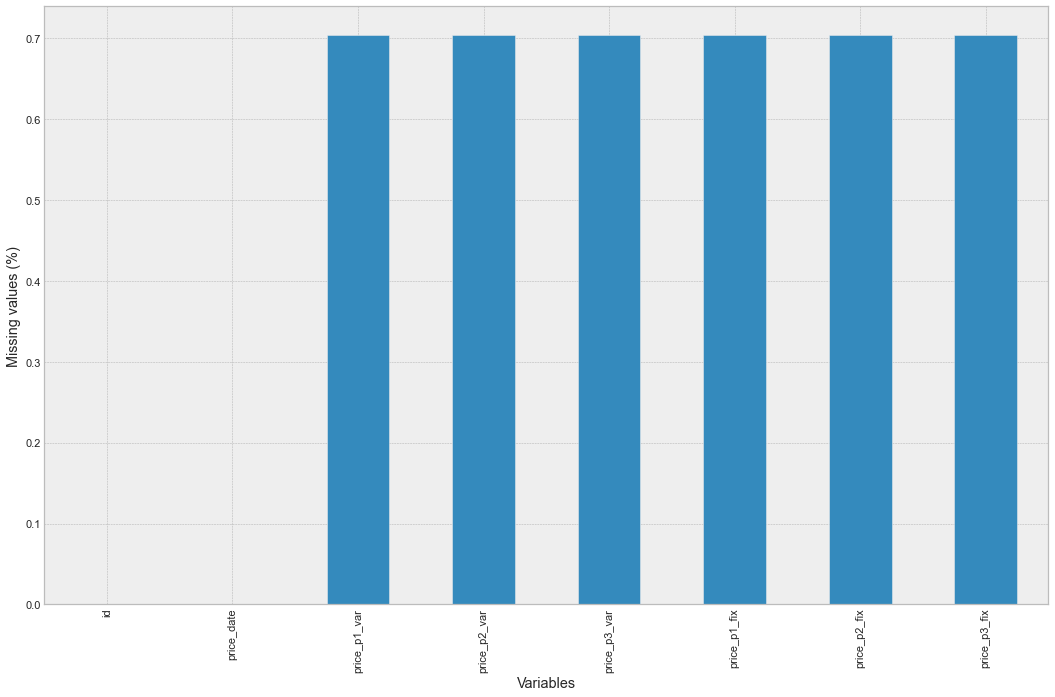

In [58]:
missing_data_percentage.plot(kind="bar", figsize=(18,11))
#set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

As per the above, there is around 0.7% missing records in the prices data

As there is not much data missing, in this case instead of removing the entries that are empty, we will simply substitute them with the median

In [59]:
history_data[history_data.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


1359 records are missing in the data

In [60]:
#replace the missing values with the median

history_data.loc[history_data["price_p1_var"].isnull(),"price_p1_var"] = history_data["price_p1_var"].median()
history_data.loc[history_data["price_p2_var"].isnull(),"price_p2_var"] = history_data["price_p2_var"].median()
history_data.loc[history_data["price_p3_var"].isnull(),"price_p3_var"] = history_data["price_p3_var"].median()
history_data.loc[history_data["price_p1_fix"].isnull(),"price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"].isnull(),"price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"].isnull(),"price_p3_fix"] = history_data["price_p3_fix"].median()

In [61]:
#check results
history_data.isnull().sum()

id              0
price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

There are no longer any missing values in out dataset

#### Missing dates

To deal with the missing dates, we will replace the these missing dates with the median (most frequent date)

In [62]:
train.loc[train["date_modif_prod"].isnull(), "date_modif_prod"] = train["date_modif_prod"].value_counts().index[0]
train.loc[train["date_end"].isnull(),"date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(), "date_renewal"] = train["date_renewal"].value_counts().index[0]

Note: it is best practive to make a binary flag that indicates when data is missing because this is informative in itself

#### Formatting date (train data)

In [63]:
#Transform date columns to datetime
train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d')
train["date_end"] = pd.to_datetime(train["date_end"], format='%Y-%m-%d')
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format='%Y-%m-%d')
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format='%Y-%m-%d')

#### Formatting dates (history data)

In [64]:
history_data["price_date"] = pd.to_datetime(history_data["price_date"], format='%Y-%m-%d')

#### Negative data

Here we deal with the negative in the historical price data

In [65]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


As per the above output, we can see that there are negative values for `price_p1_fix`, `price_p2_fix` and `price_p3_fix`

In [66]:
#how many records are negative in the history_data
history_data[(history_data.price_p1_fix < 0) | (history_data.price_p2_fix < 0) | (history_data.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


There are 10 entiries which are negative; this is more likely to be due to corrupted data rather than a 'price discount'.

These negative values will be replaced by the median (the most frequent)

In [67]:
#replace the negative values with median
history_data.loc[history_data["price_p1_fix"] < 0,"price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"] < 0,"price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"] < 0,"price_p3_fix"] = history_data["price_p3_fix"].median()

In [68]:
#check results 
history_data[(history_data.price_p1_fix < 0) | (history_data.price_p2_fix < 0) | (history_data.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix


## Relationship between variables

Correlation matrix will be used to analyse the relationship between two variables in the dataset

In [69]:
#calculate correlation matrix
corr = train.corr()
corr

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.471233,0.919545,0.165168,0.139526,-0.043708,0.085996,-0.033546,0.146758,-0.025418,0.139353,-0.065500,-0.045779,0.308567,0.120491,0.008810,0.102423,-0.051759
cons_gas_12m,0.471233,1.000000,0.447209,0.059525,0.057619,-0.014945,0.040327,-0.022416,0.078456,-0.027193,0.060609,-0.016867,-0.008242,0.272005,0.058930,-0.008626,0.052365,-0.040880
cons_last_month,0.919545,0.447209,1.000000,0.129574,0.151476,-0.037773,0.076066,-0.024242,0.123164,-0.020057,0.153861,-0.054114,-0.037696,0.350711,0.096424,0.004860,0.089565,-0.046931
forecast_cons_12m,0.165168,0.059525,0.129574,1.000000,0.746076,0.014923,0.390550,-0.217315,0.245845,0.058169,0.725550,-0.184179,-0.141642,0.013283,0.768871,0.064431,0.583119,0.007395
forecast_cons_year,0.139526,0.057619,0.151476,0.746076,1.000000,-0.009000,0.329201,-0.206041,0.225691,0.053678,0.981732,-0.139177,-0.106576,0.013811,0.537701,0.066105,0.442228,0.002756
forecast_discount_energy,-0.043708,-0.014945,-0.037773,0.014923,-0.009000,1.000000,-0.019469,0.319202,0.049174,0.024477,0.011383,0.199609,0.151140,0.055162,0.013500,-0.071723,-0.022646,0.012344
forecast_meter_rent_12m,0.085996,0.040327,0.076066,0.390550,0.329201,-0.019469,1.000000,-0.558751,0.636761,0.013597,0.296259,-0.018957,0.000856,0.000050,0.336343,0.112271,0.600594,0.029971
forecast_price_energy_p1,-0.033546,-0.022416,-0.024242,-0.217315,-0.206041,0.319202,-0.558751,1.000000,-0.364849,0.389218,-0.164657,0.184782,0.029119,0.025854,-0.185221,-0.199922,-0.352961,-0.003337
forecast_price_energy_p2,0.146758,0.078456,0.123164,0.245845,0.225691,0.049174,0.636761,-0.364849,1.000000,-0.137244,0.211061,0.063421,0.074075,0.025949,0.251761,0.102997,0.339373,0.025597
forecast_price_pow_p1,-0.025418,-0.027193,-0.020057,0.058169,0.053678,0.024477,0.013597,0.389218,-0.137244,1.000000,0.051517,-0.114822,-0.134192,-0.011416,-0.005513,-0.037951,0.052583,0.004034


The above correlation matrix shows that there is a strong positive correlation between the price of energy and the price of power in the second period. There is a weak negative relationship between churn and the prices of energy and power in all the periods. 

## 7. Pickling

Pickling is useful for applications where we need some degree of persistency in our data. This saves data to the disk so it can be worked on at a later data.

In [70]:
import os

In [71]:
if not os.path.exists(os.path.join("..", "processed_data")):
    os.makedirs(os.path.join("..", "processed_data"))

In [72]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_data.pkl")
PICKLE_HISTORY_DIR = os.path.join("..", "processed_data", "history_data.pkl")

In [73]:
pd.to_pickle(train, PICKLE_TRAIN_DIR)
pd.to_pickle(history_data, PICKLE_HISTORY_DIR)